# Imports

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Predicting CA Housing Prices Using Linear Regression

##Load the California housing prices dataset

Our goal is to predict the median house price of a variety of California census block groups (think of these as small neighborhoods). We are given just under 21,000 samples, each with eight features, outlined below:


*   Median Household Income (in hundreds of thousands of dollars)
*   House Age (in years)
*   Average Number of Rooms
*   Average Number of Bedrooms
*   Population
*   Average Number of Occupants
*   Latitude
*   Longitude

DO NOT EDIT!

In [3]:
cali_housing = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=True)
cali_df = cali_housing['frame']
cali_features = cali_housing['data']
cali_targets = cali_housing['target']
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


##Explore the data

After we've loaded the dataset, we need to explore it. 

Remember: Our ultimate goal is to predict the median house price. Therefore, it would be wise to first see which features are correlated with MedHouseVal. 

Your task: Explore the data! Make plots, do calculations, it's really up to you. Try to extract more information from this dataset that will make it easier to predict the median home price.

**AT MINIMUM, you must complete the following:**
For each feature in the cali_df, generate a scatter plot of MedHouseVal vs. that feature. You should have eight scatter plots in total, each fully labeled with title and axes labels.

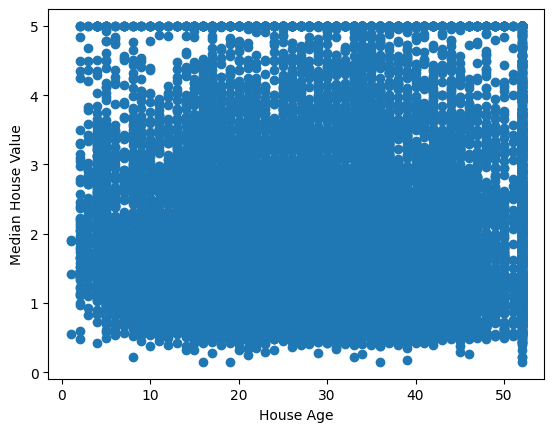

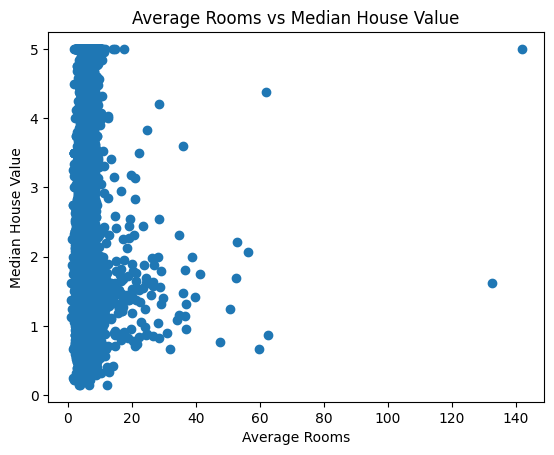

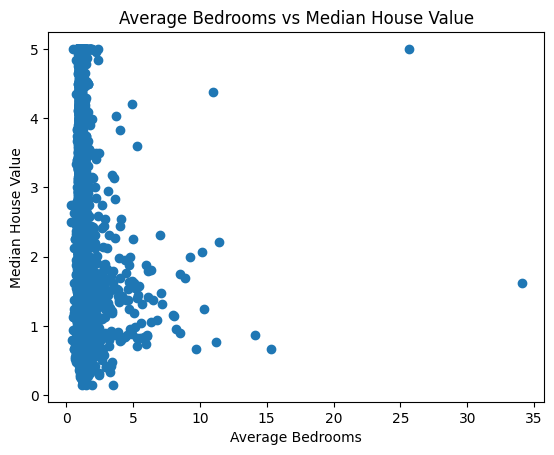

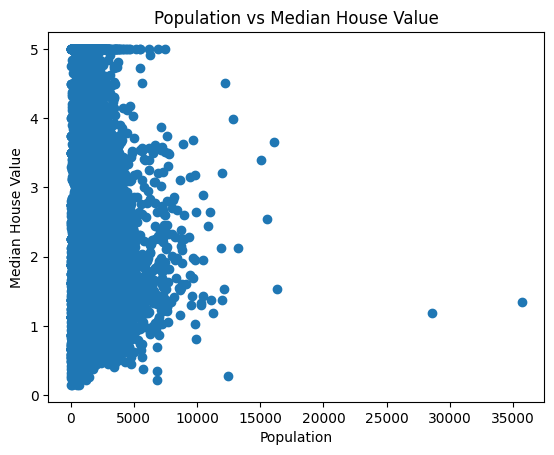

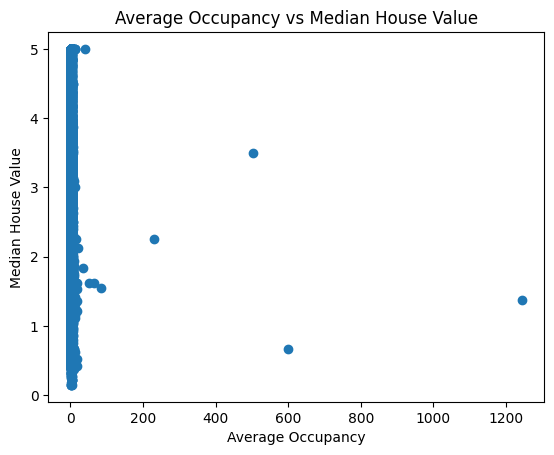

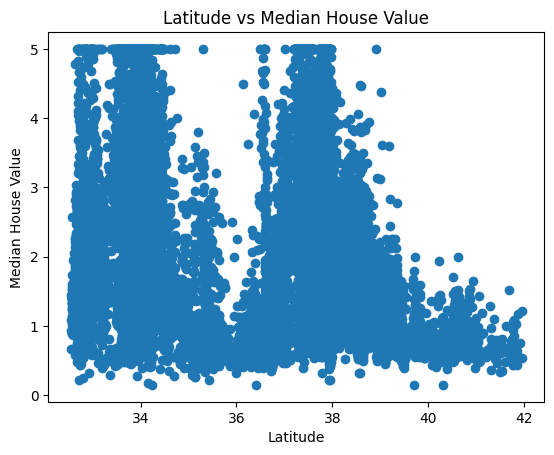

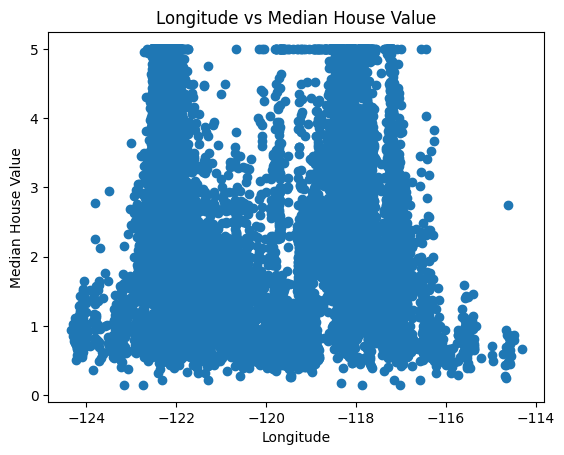

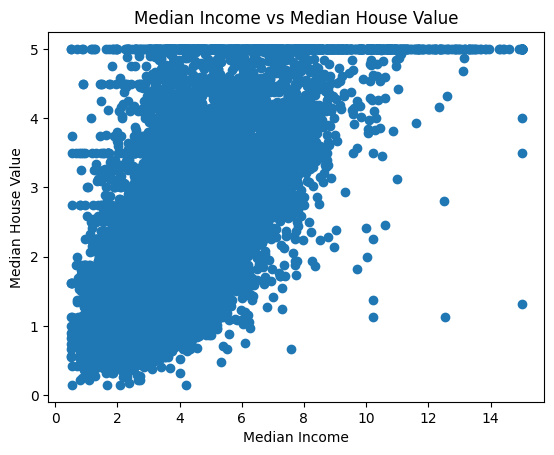

In [11]:
plt.plot(cali_df.HouseAge, cali_df.MedHouseVal, 'o')
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.show()

plt.plot(cali_df.AveRooms, cali_df.MedHouseVal, 'o')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.title('Average Rooms vs Median House Value')
plt.show()

plt.plot(cali_df.AveBedrms, cali_df.MedHouseVal, 'o')
plt.xlabel('Average Bedrooms')
plt.ylabel('Median House Value')
plt.title('Average Bedrooms vs Median House Value')
plt.show()

plt.plot(cali_df.Population, cali_df.MedHouseVal, 'o')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Population vs Median House Value')
plt.show()

plt.plot(cali_df.AveOccup, cali_df.MedHouseVal, 'o')
plt.xlabel('Average Occupancy')
plt.ylabel('Median House Value')
plt.title('Average Occupancy vs Median House Value')
plt.show()

plt.plot(cali_df.Latitude, cali_df.MedHouseVal, 'o')
plt.xlabel('Latitude')
plt.ylabel('Median House Value')
plt.title('Latitude vs Median House Value')
plt.show()

plt.plot(cali_df.Longitude, cali_df.MedHouseVal, 'o')
plt.xlabel('Longitude')
plt.ylabel('Median House Value')
plt.title('Longitude vs Median House Value')
plt.show()

plt.plot(cali_df.MedInc, cali_df.MedHouseVal, 'o')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()



##Split data into train/test split

One of the most important steps of machine learning is partitioning your dataset into "training" and "testing" datasets. These two datasets are non-overlapping; that is, none of the samples found in the training set are in the testing set, and vice versa.

For our lab, we will use $\frac{1}{3}$ of the dataset for testing, and the rest ($\frac{2}{3}$) for training.

In [12]:
# MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	MedHouseVal
cali_features_of_interest = ['MedInc', 'Latitude', 'Longitude', 'AveBedrms'] # ONLY EDIT THIS LINE!
cali_features_train, cali_features_test, cali_targets_train, cali_targets_test = train_test_split(cali_df[cali_features_of_interest], cali_df['MedHouseVal'], test_size=0.333, random_state=69)
cali_features_train.shape, cali_features_test.shape, cali_targets_train.shape, cali_targets_test.shape

((13766, 4), (6874, 4), (13766,), (6874,))

##Fit a linear regression model using the chosen features from the training dataset

DO NOT EDIT!

In [13]:
pricing_model = LinearRegression()
fitted_pricing_model = pricing_model.fit(cali_features_train, cali_targets_train)
print("Model Coefficients: ", fitted_pricing_model.coef_)
print("Model Intercept: ", fitted_pricing_model.intercept_)

Model Coefficients:  [ 0.36604968 -0.50007405 -0.5163023   0.15030184]
Model Intercept:  -43.42629932174406


##Evaluate the linear regression model using testing dataset

Our chosen evaluation metric for our linear regression model is the $R^2$ value. You might have seen this when working with trendlines in Microsoft Excel -- the closer the $R^2$ value is to one, the better the model "fits" (or performs on) our testing data.

It is important to note that while we do look at the model's $R^2$ value on the training dataset, what we ultimately care about is how well our model performs on *unseen* data -- therefore, to determine our "best" model, we will pick the one with the largest $R^2$ value on our testing dataset. 

The cell below outputs two values when run -- the first is the $R^2$ value when evaluating using the training dataset, and the second is the $R^2$ value when evaluating using the testing dataset (this is the number we care about).

**Your Task:** How high of an $R^2$ value can you reach? Turn this into a competition with the other students in your section. Ultimately, your feature selections will determine your testing $R^2$ value -- be creative in making your selections! You can add features of your own, combine the existing features, or even arithmetically transform the existing features. 

In [14]:
fitted_pricing_model.score(cali_features_train, cali_targets_train), fitted_pricing_model.score(cali_features_test, cali_targets_test)

(0.5893095956295984, 0.5871658781007645)

# Task 2: Classifying Penguin Species using k-Nearest Neighbors

##Imports and installs

DO NOT EDIT!

In [5]:
%pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn.neighbors import KNeighborsClassifier

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


##Load the penguins dataset

The second dataset we'll be working with is a collection of body measurements for three different species of penguins -- Adelie, Gentoo, and Chinstrap. Our goal is to build a k-Nearest Neighbors classifier to classify new penguins as one of these three species.

We are given the following features to work with:


*   Island
*   Bill length (in millimeters)
*   Bill depth (in millimeters)
*   Flipper length (in millimeters)
*   Body mass (in grams)
*   Sex
*   Year Measured

Since we're only interested in utilizing the quantitative features, we'll ignore island, sex, and year.

First -- load the penguins dataset. DO NOT EDIT!







In [15]:
penguins_df = load_penguins()
penguins_df.dropna(inplace=True)
penguins_df.reset_index(inplace=True, drop=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


When dealing with a classification problem, it is always good to see how many examples of each class we have -- in our case, we need to check to see how many of each penguin species there are. 

**Your task**: Print out the number of Adelie, Gentoo, and Chinstrap penguins in penguins_df.

In [18]:
num_Adelie = penguins_df[penguins_df['species'] == 'Adelie'].shape[0]
num_Chinstrap = penguins_df[penguins_df['species'] == 'Chinstrap'].shape[0]
num_Gentoo = penguins_df[penguins_df['species'] == 'Gentoo'].shape[0]

print("Number of Adelie: ", num_Adelie)
print("Number of Chinstrap: ", num_Chinstrap)
print("Number of Gentoo: ", num_Gentoo)

Number of Adelie:  146
Number of Chinstrap:  68
Number of Gentoo:  119


##Explore the dataset

Same deal as before -- we need to do some exploration of this dataset to see which features will help the most in trying to classify new (unseen) penguins. You can do whatever you want here -- make plots, perform calculations, whatever you feel will help you decide on the best features to use in our k-NN classifier.

**AT MINIMUM, you must complete the following task:**

Using Matplotlib, generate scatter plots of each pair of quantitative features that we are interested in (bill length, bill depth, flipper length, body mass). You should color the points in the scatter plot based on the species of penguin that they belong to. You should have twelve plots in total.

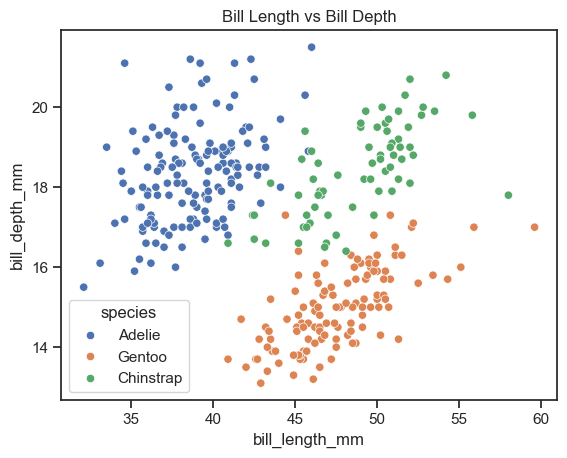

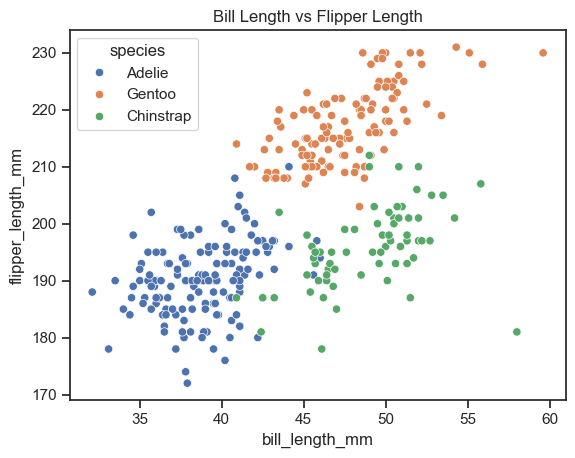

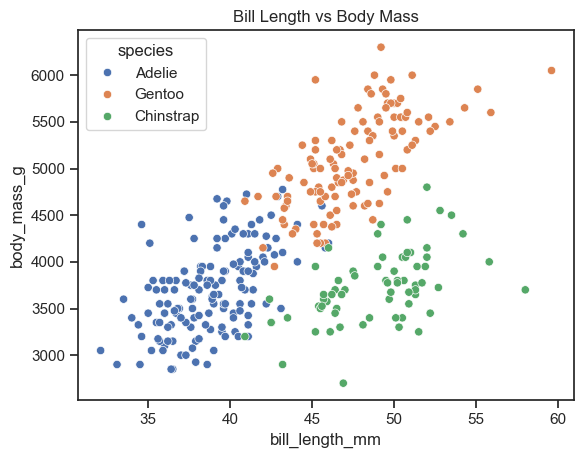

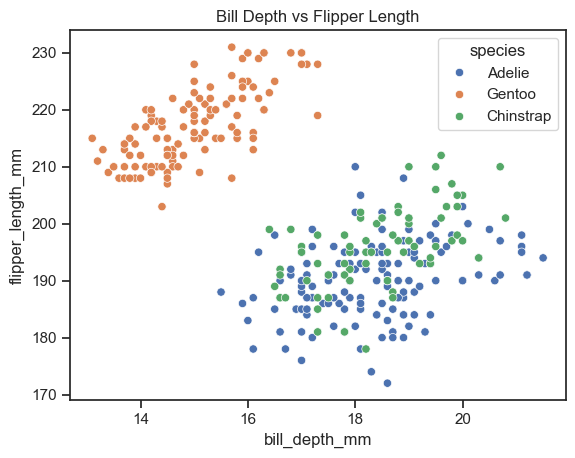

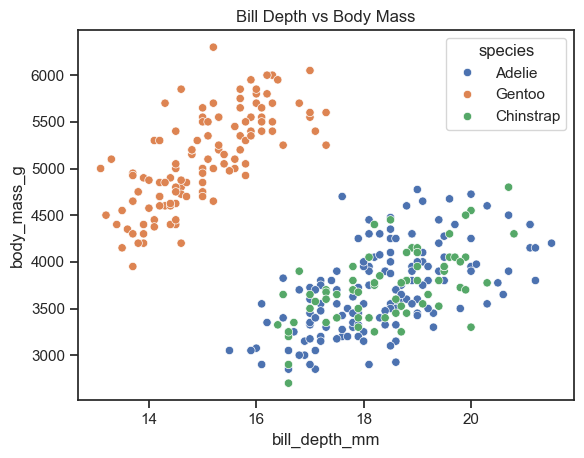

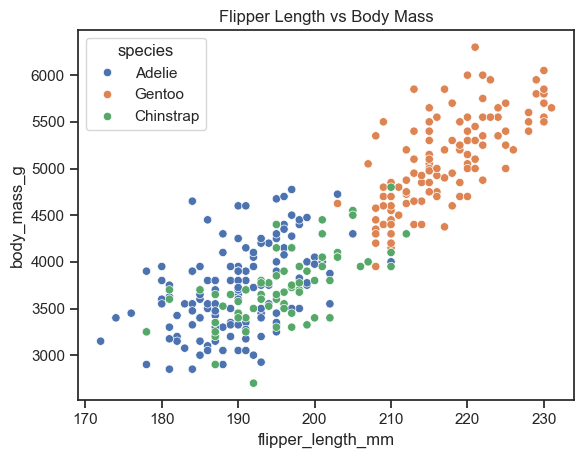

In [23]:
import seaborn as sns

# Generate scatter plots
sns.scatterplot(data=penguins_df, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Bill Length vs Bill Depth")
plt.show()

sns.scatterplot(data=penguins_df, x="bill_length_mm", y="flipper_length_mm", hue="species")
plt.title("Bill Length vs Flipper Length")
plt.show()

sns.scatterplot(data=penguins_df, x="bill_length_mm", y="body_mass_g", hue="species")
plt.title("Bill Length vs Body Mass")
plt.show()

sns.scatterplot(data=penguins_df, x="bill_depth_mm", y="flipper_length_mm", hue="species")
plt.title("Bill Depth vs Flipper Length")
plt.show()

sns.scatterplot(data=penguins_df, x="bill_depth_mm", y="body_mass_g", hue="species")
plt.title("Bill Depth vs Body Mass")
plt.show()

sns.scatterplot(data=penguins_df, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title("Flipper Length vs Body Mass")
plt.show()


##Split the dataset

Once again, we need to split the dataset into a train and test set. 

After you have completed your exploration of the data and decided which features to use in your classifier, edit the list called *penguin_features_of_interest* below to contain the features you chose.

In [25]:
penguin_features_of_interest = ['bill_length_mm', 'bill_depth_mm'] # ONLY EDIT THIS LINE!
penguin_features_train, penguin_features_test, penguin_targets_train, penguin_targets_test = train_test_split(penguins_df[penguin_features_of_interest], penguins_df['species'], test_size=0.333, random_state=69, stratify=penguins_df['species'])
penguin_features_train.shape, penguin_features_test.shape, penguin_targets_train.shape, penguin_targets_test.shape

((222, 2), (111, 2), (222,), (111,))

##Building the k-NN Classifier

Now it is time to build our classifier! DO NOT EDIT!

In [26]:
k_values = np.array(range(1,101)) # use k values between 1-100
test_accuracy = np.zeros((len(k_values))) # array to hold testing accuracies for each value of k
for k in k_values: # iterate over all values of k
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # instantiate k-NN classifier
  knn.fit(penguin_features_train, penguin_targets_train) # fit the classifier to our training dataset
  test_accuracy[k-1] = knn.score(penguin_features_test, penguin_targets_test) # evaluate classifier using testing dataset, place in array

##Evaluate the classifier

**Your Task**: Using the *k_values* and *test_accuracy* arrays defined in the previous cell, generate a line plot of the testing accuracy vs. the different values of k. Look for the value of k that yielded the highest testing accuracy -- this is the optimal value of k for your chosen features!

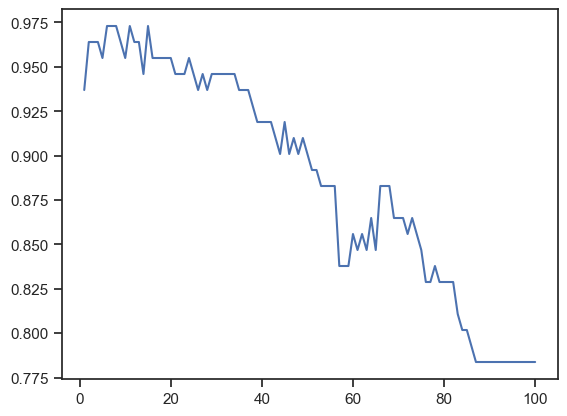

In [27]:
plt.plot(k_values, test_accuracy)

# Task 3: Clustering with k-Means

##Generate the clustering datasets seen in the pre-lab

The cell below generates the six unique datasets that you saw in the pre-lab.

DO NOT EDIT

In [28]:
np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
                             
clustering_datasets = [blobs, aniso, noisy_moons, noisy_circles, varied, no_structure]

##Applying the k-Means algorithm

We're going to use scikit-learn's implementation of the k-Means clustering algorithm that you saw in the pre-lab video. Our goal is to learn more about k-Means clustering by applying to the six datasets you saw during the pre-lab. 

**Your task**: For each of the datasets in the *clustering_datasets* list defined in the cell above, cluster them using scikit-learn's *KMeans().fit_predict()* function (an example of how to do this is shown below). The function returns an array containing the cluster number that each data point belongs to. Using this, create a scatter plot of each dataset, with the points colored based on their cluster number. Repeat for k = 2, 3, 4, and 5, giving each plot a title indicating which value of k was used for the culustering.

You should have a total of (6 datsets) * (4 k-values) = **24 plots**.

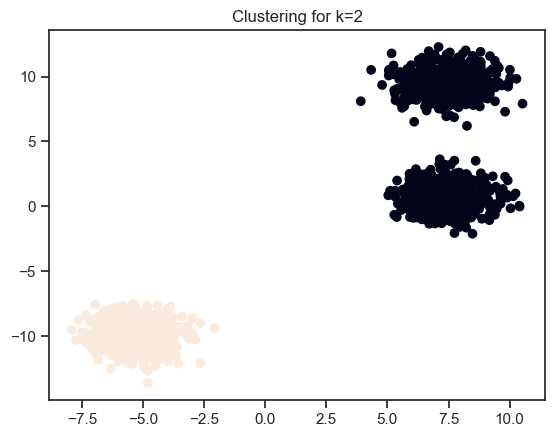

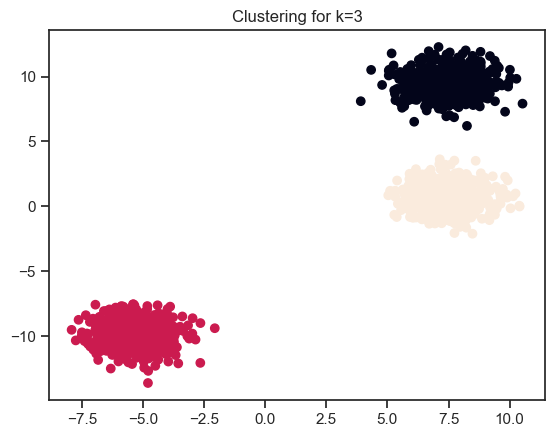

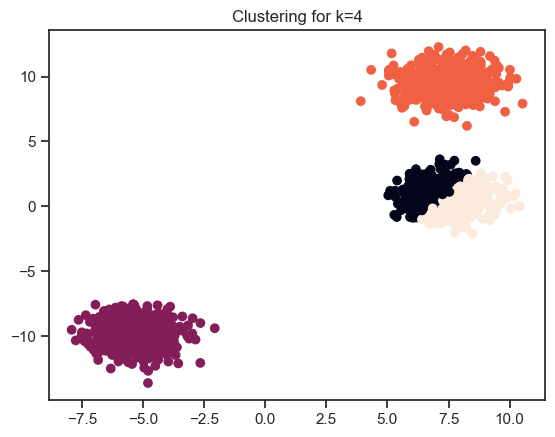

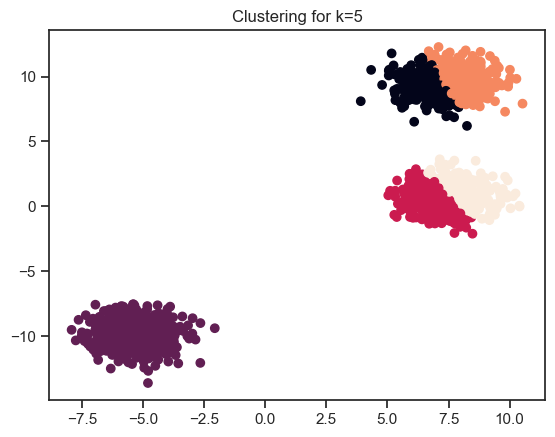

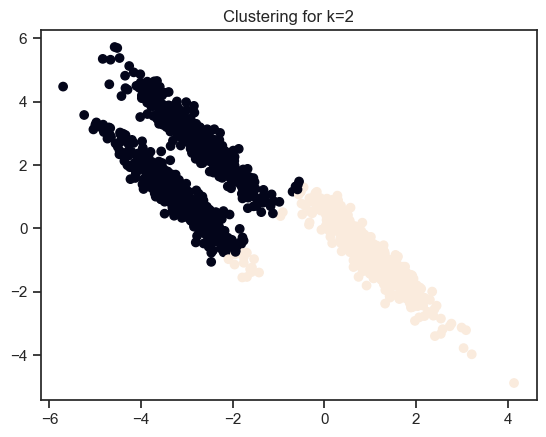

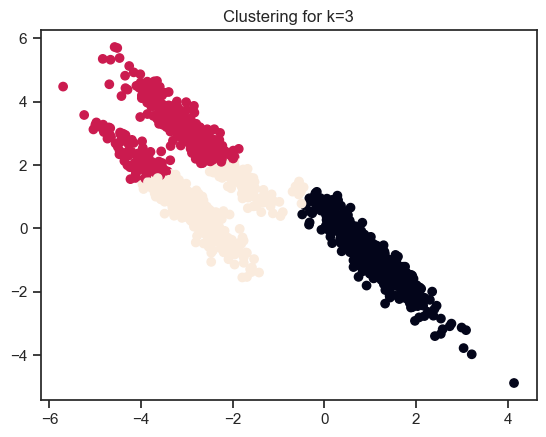

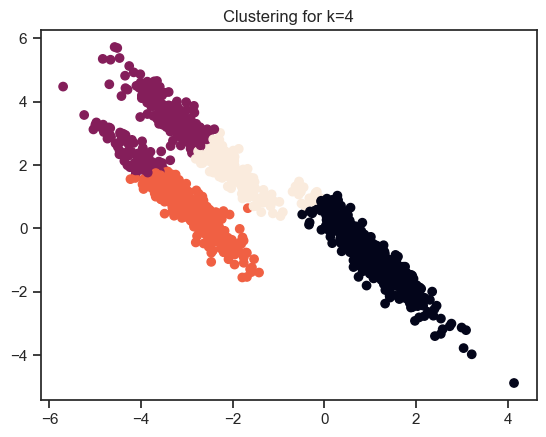

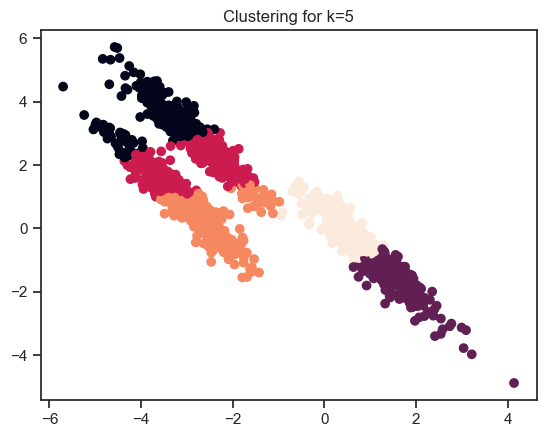

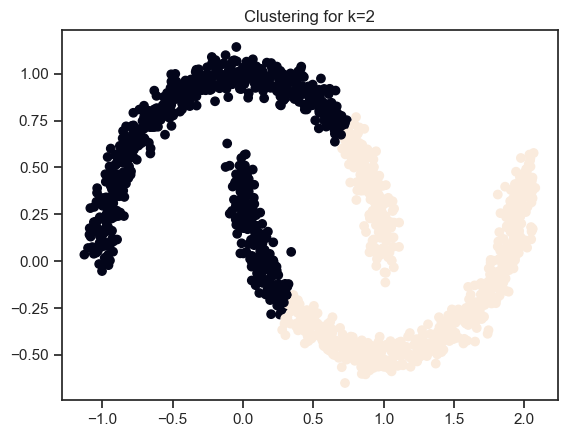

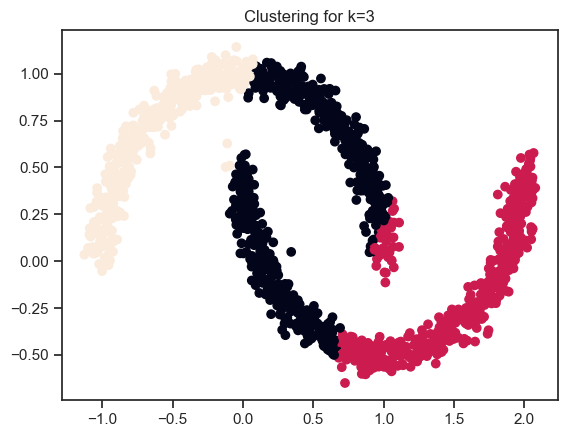

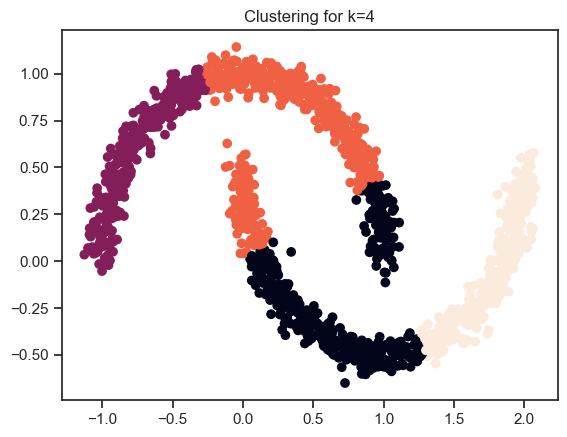

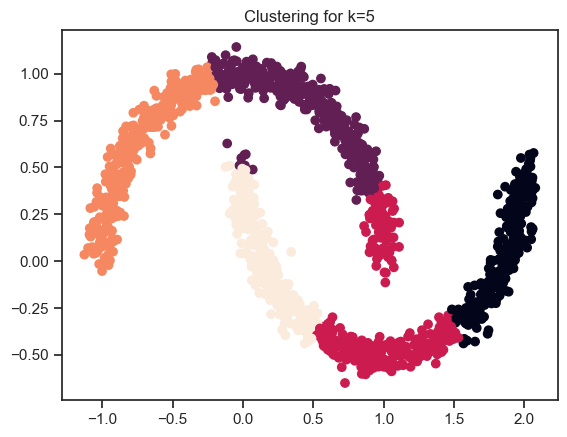

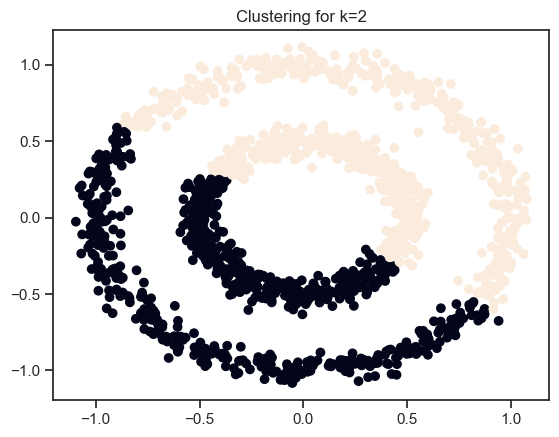

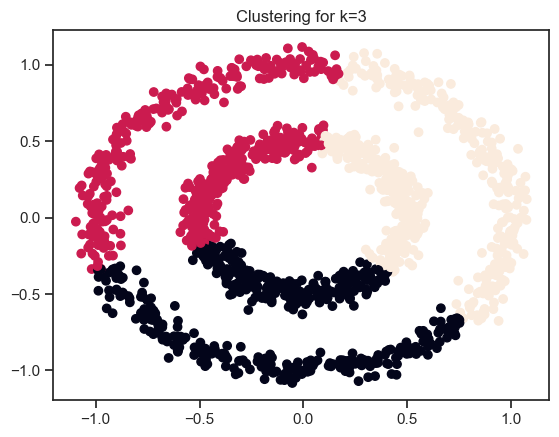

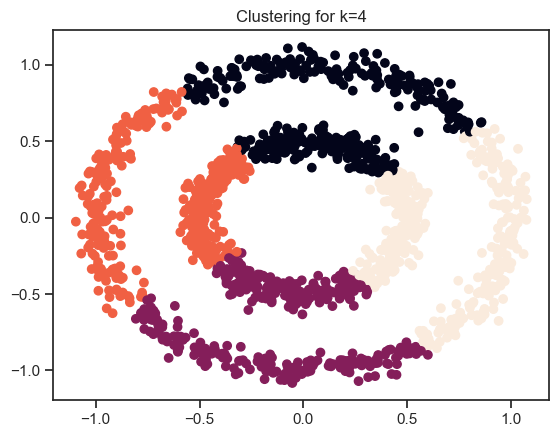

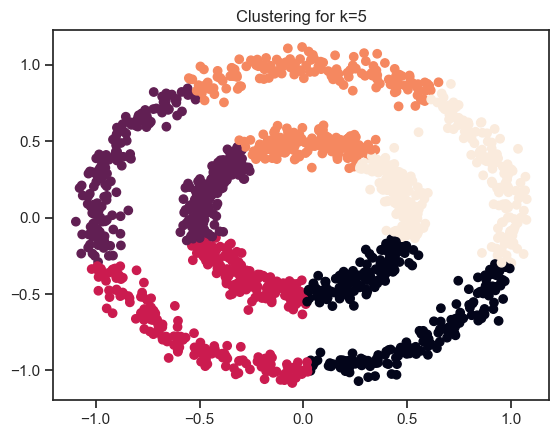

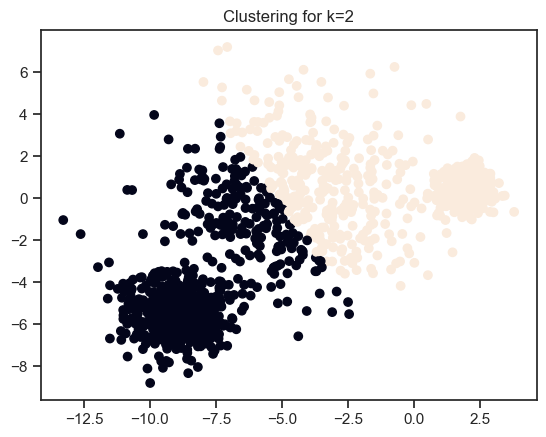

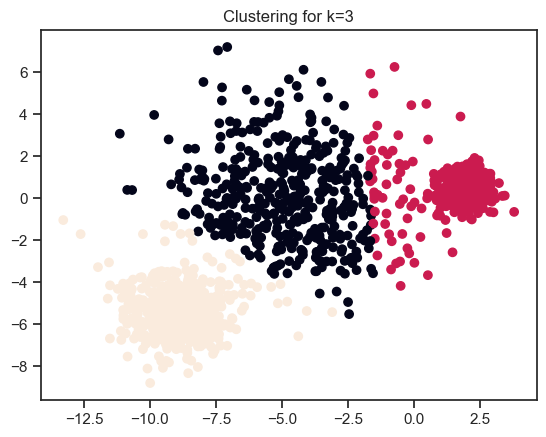

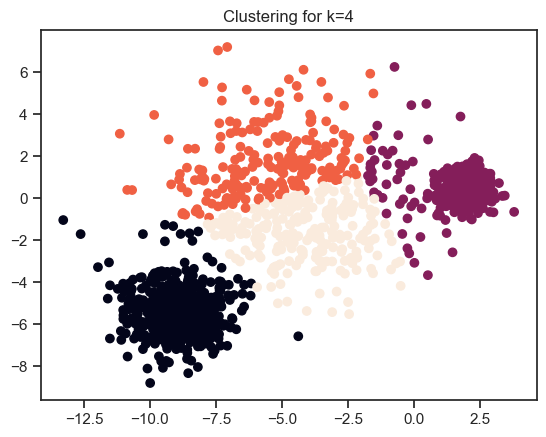

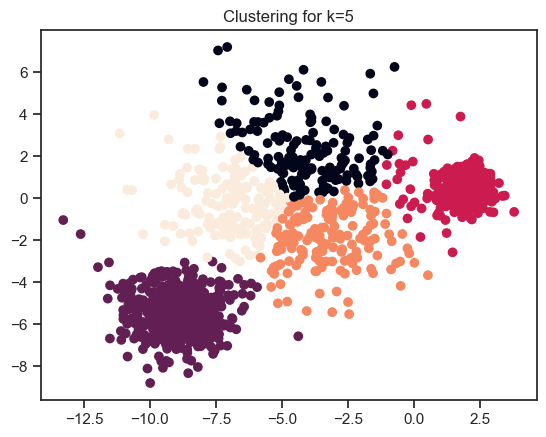

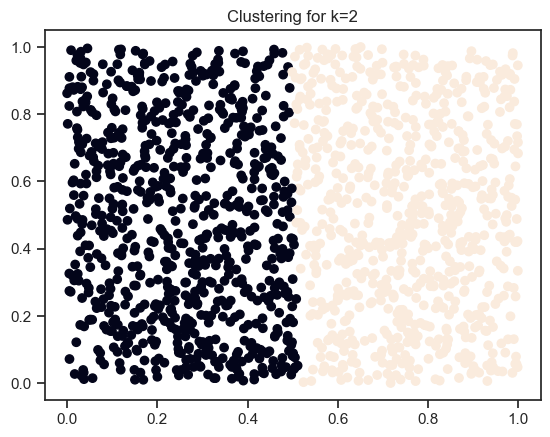

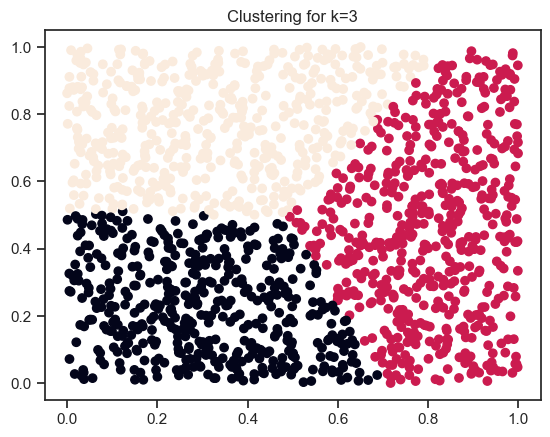

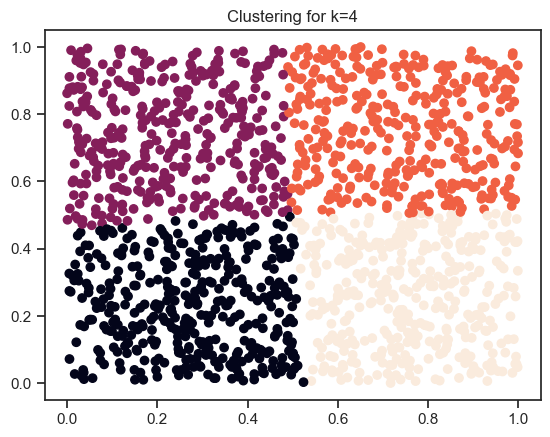

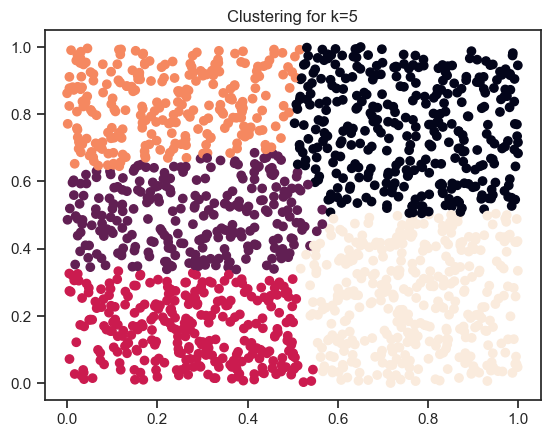

In [31]:
# The line below shows an example of how to use the KMeans().fit_predict() function.
# Pass the value of k to the n_clusters parameter of KMeans(), then pass a dataset to fit_predict()
# labels = KMeans(n_clusters=k).fit_predict(some_dataset[0])

k_values = [2, 3, 4, 5]

for dataset in clustering_datasets:
    for k in k_values:
        labels = KMeans(n_clusters=k).fit_predict(dataset[0])
        plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=labels)
        plt.title(f"Clustering for k={k}")
        plt.show()



In the cell below, comment on how accurate your hypotheses from the pre-lab were for the case where k = 3. For which datasets did your intuitively-drawn clusters match the actual clusters? For which datasets was your intuition wrong?

*Some of my guesses were on spot, others where the shape was very uniform, it was hard to guess exactly where the circles would go. Like even on the last one, I thought it would be side by side, but it makes sense that it is more like a peace sign. Although I did get tricked with the 3 long circles. I thought i could just circle each group but instead if it is just by closest it doesnt take shape into account.*

##Optional (10pts bonus): Explore More Clustering Algorithms

K-Means is only one of *many* clustering algorithms -- upon completing the experiments above, you should see that the results aren't always intuitive for certain datasets.

**Your Task:** Pick one (or more) of the other clustering algorithms implemented in scikit-learns clustering package: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Repeat the experiments above using the new clustering algorithm(s) you chose. Once again, there should be 24 plots per additional clustering algorithm you chose.

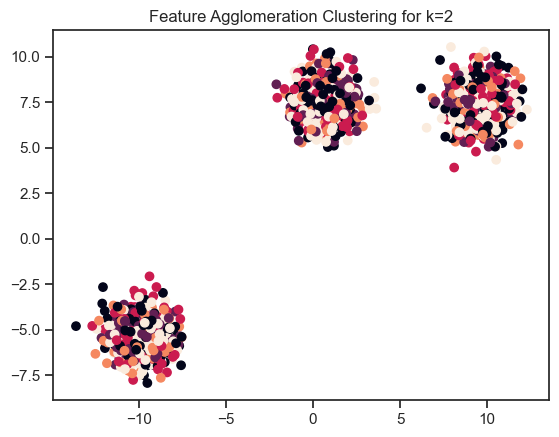

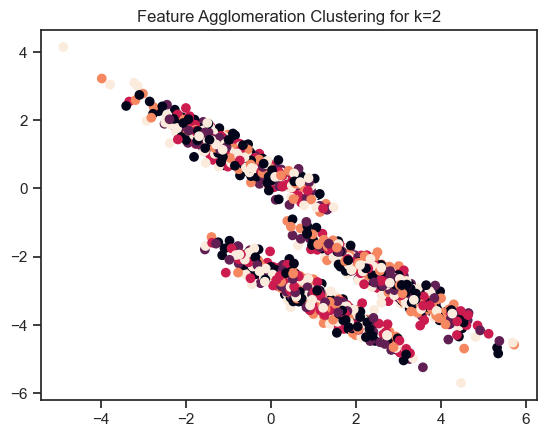

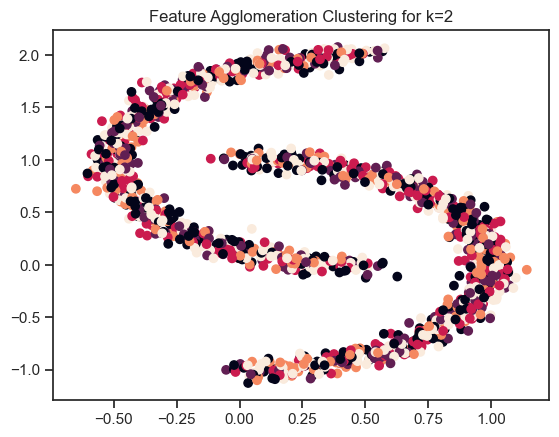

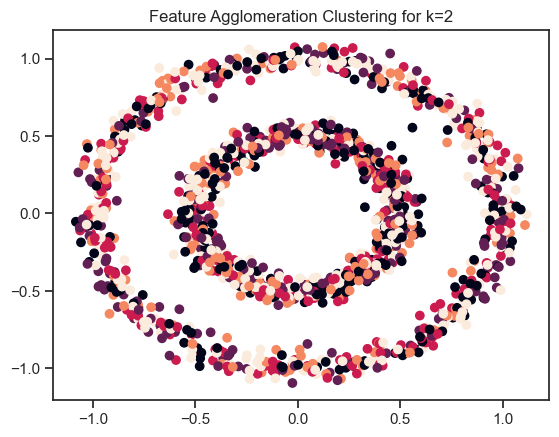

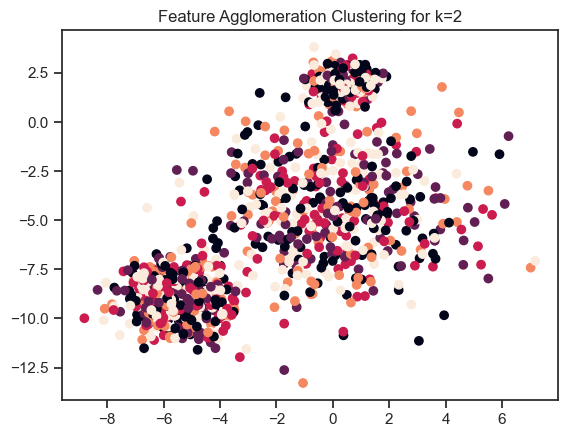

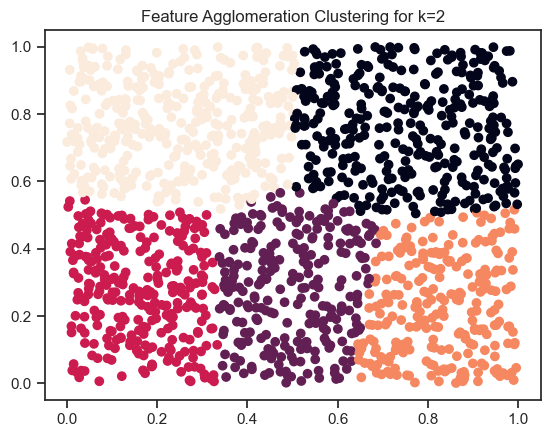

In [36]:
from sklearn.cluster import FeatureAgglomeration
import matplotlib.pyplot as plt

k_values = [2]

for dataset in clustering_datasets:
    for k in k_values:
        # Additional plots using FeatureAgglomeration
        feature_agg = FeatureAgglomeration(n_clusters=k)
        transformed_data = feature_agg.fit_transform(dataset[0])
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
        plt.title(f"Feature Agglomeration Clustering for k={k}")
        plt.show()

**In the cell below, comment on how the results of the new clustering algorithm(s) you chose differ from those of k-Means. For which datasets did the new clustering algorithm(s) perform "better" than k-Means (in your opinion)? For which datasets did they perform "worse" (also in your opinion)?**

*For some reason it only worked with k=2, but it did a good job with the last one. I assume this is a lot better for grouping areas in a flat image rather than specific data points on a graph. As the other ones with "shapes" seemed to confuse this algorithm.*